In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# Load AAPL stock data
stock_data = yf.download('AAPL', start='2021-01-01', end='2022-01-01')
stock_data['Date'] = stock_data.index

# Retain required columns
data = stock_data[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']].copy()
data.reset_index(drop=True, inplace=True)

[*********************100%***********************]  1 of 1 completed


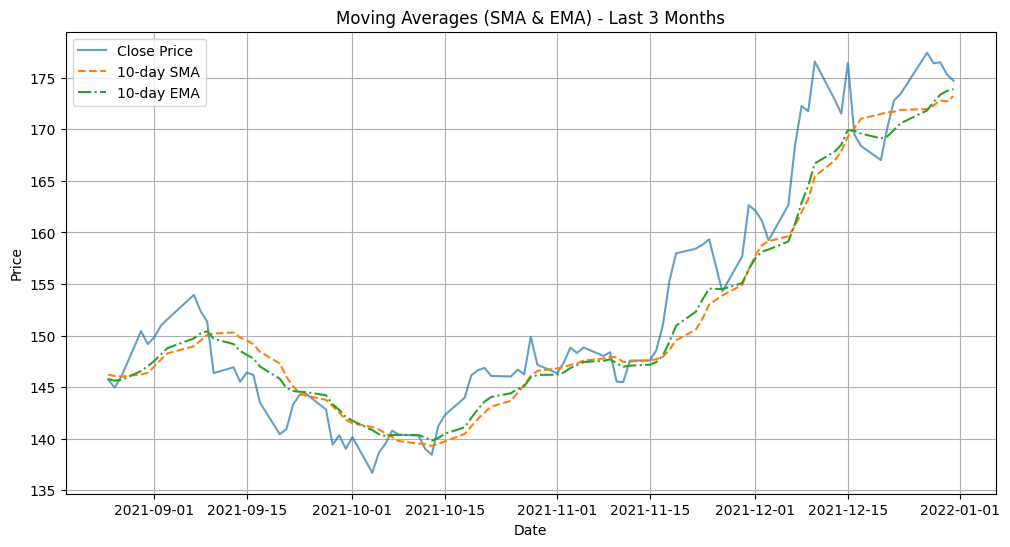

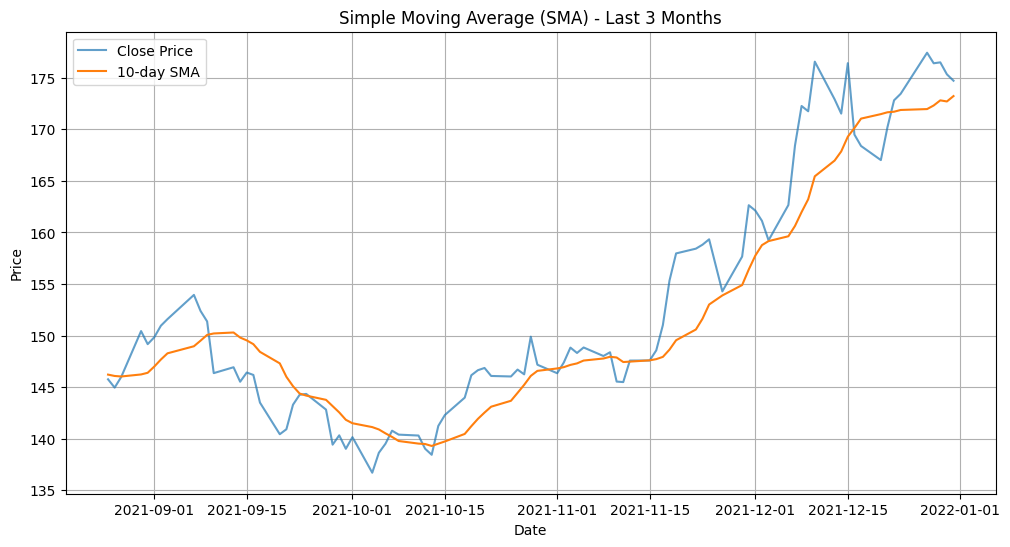

In [73]:
# Moving Averages
data['SMA_10'] = data['Close'].rolling(window=10).mean()
data['EMA_10'] = data['Close'].ewm(span=10, adjust=False).mean()

# Plot
data_recent = data.tail(90).copy()
plt.figure(figsize=(12, 6))
plt.plot(data_recent['Date'], data_recent['Close'], label='Close Price', alpha=0.7)
plt.plot(data_recent['Date'], data_recent['SMA_10'], label='10-day SMA', linestyle='--')
plt.plot(data_recent['Date'], data_recent['EMA_10'], label='10-day EMA', linestyle='-.')
plt.title('Moving Averages (SMA & EMA) - Last 3 Months')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

# Plot SMA separately
plt.figure(figsize=(12, 6))
plt.plot(data_recent['Date'], data_recent['Close'], label='Close Price', alpha=0.7)
plt.plot(data_recent['Date'], data_recent['SMA_10'], label='10-day SMA')
plt.title('Simple Moving Average (SMA) - Last 3 Months')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()


Ticker      AAPL
0            NaN
1       1.564545
2      -4.312325
3       4.224297
4       1.104996
..           ...
247     3.984756
248    -1.023239
249     0.088547
250    -1.160995
251    -0.619843

[252 rows x 1 columns]
[0.         1.56454468 0.         4.22429657 1.10499573 0.
 0.         2.0437088  0.         0.         0.67472839 4.10696411
 4.7328186  2.15130615 3.76473999 0.23468018 0.         0.
 0.         2.13175964 0.8311615  0.         3.37356567 0.
 0.14691162 0.         0.         0.         0.23503113 0.
 0.         0.         0.15667725 0.         0.         0.
 0.         0.2644043  6.39495087 0.         0.         0.
 1.26333618 0.         4.63218689 0.         1.93904114 0.
 2.89878845 1.54733276 0.         0.         0.         3.32968903
 0.         0.         0.48966217 0.60717773 0.17627716 0.
 2.20348358 0.83242035 2.8400116  0.30358124 1.65505219 2.40910339
 2.5854187  0.         3.12399292 0.         2.41891479 0.
 0.66593933 0.         0.38191223 0.    

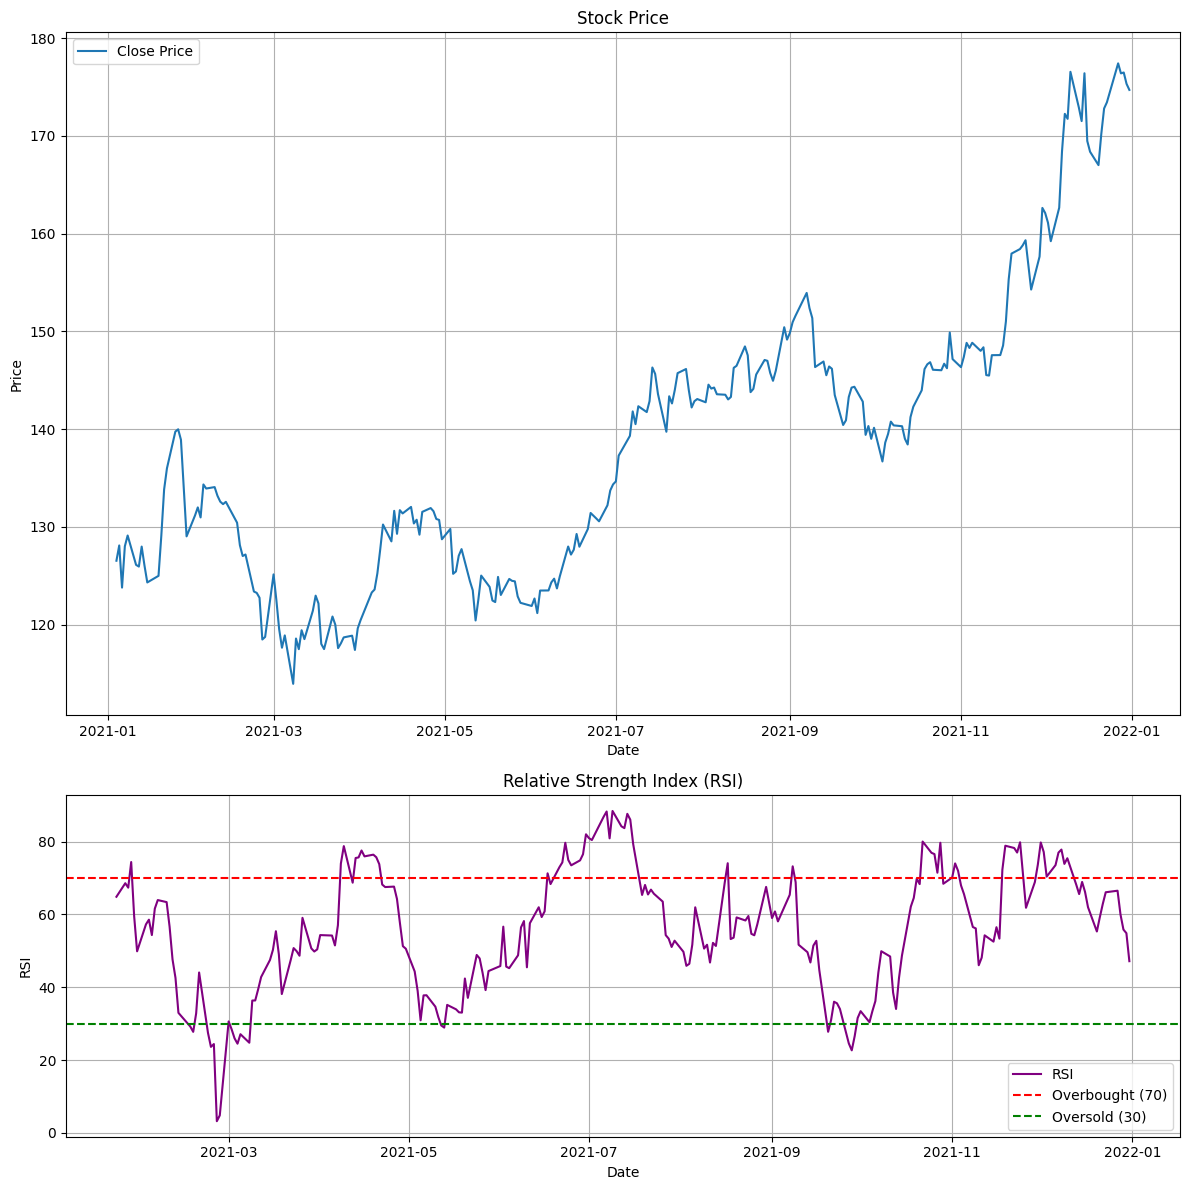

In [74]:
# RSI Calculation
delta = data['Close'].diff()
print(delta)
gain = np.where(delta > 0, delta, 0).flatten()  # Flatten the array to 1D
loss = np.where(delta < 0, -delta, 0).flatten() # Flatten the array to 1D
print(gain)
print(loss)

avg_gain = pd.Series(gain).rolling(window=14).mean()
avg_loss = pd.Series(loss).rolling(window=14).mean()
rs = avg_gain / avg_loss
print(rs)
data['RSI'] = 100 - (100 / (1 + rs))
print(data.head())
# Create figure with 2 subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12), height_ratios=[2, 1])

# Plot prices
ax1.plot(data['Date'], data['Close'], label='Close Price')
ax1.set_title('Stock Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price')
ax1.grid()
ax1.legend()

# Plot RSI
ax2.plot(data['Date'], data['RSI'], label='RSI', color='purple')
ax2.axhline(70, color='red', linestyle='--', label='Overbought (70)')
ax2.axhline(30, color='green', linestyle='--', label='Oversold (30)')
ax2.set_title('Relative Strength Index (RSI)')
ax2.set_xlabel('Date')
ax2.set_ylabel('RSI')
ax2.grid()
ax2.legend()

plt.tight_layout()
plt.show()

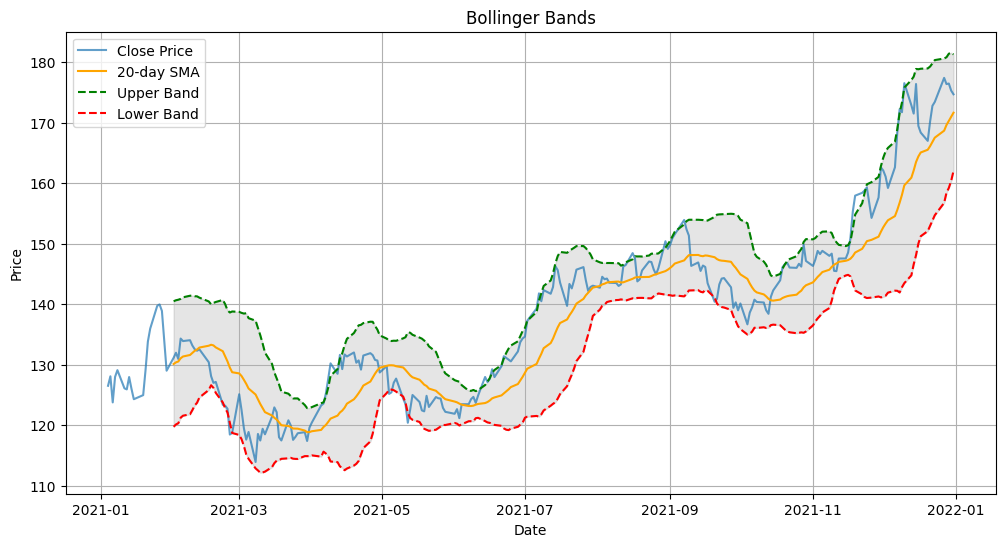

In [75]:
# Bollinger Bands
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['STD_20'] = data['Close'].rolling(window=20).std()
data['Upper_Band'] = data['SMA_20'] + (2 * data['STD_20'])
data['Lower_Band'] = data['SMA_20'] - (2 * data['STD_20'])

# Plot
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Close Price', alpha=0.7)
plt.plot(data['Date'], data['SMA_20'], label='20-day SMA', color='orange')
plt.plot(data['Date'], data['Upper_Band'], label='Upper Band', linestyle='--', color='green')
plt.plot(data['Date'], data['Lower_Band'], label='Lower Band', linestyle='--', color='red')
plt.fill_between(data['Date'], data['Lower_Band'], data['Upper_Band'], color='grey', alpha=0.2)
plt.title('Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

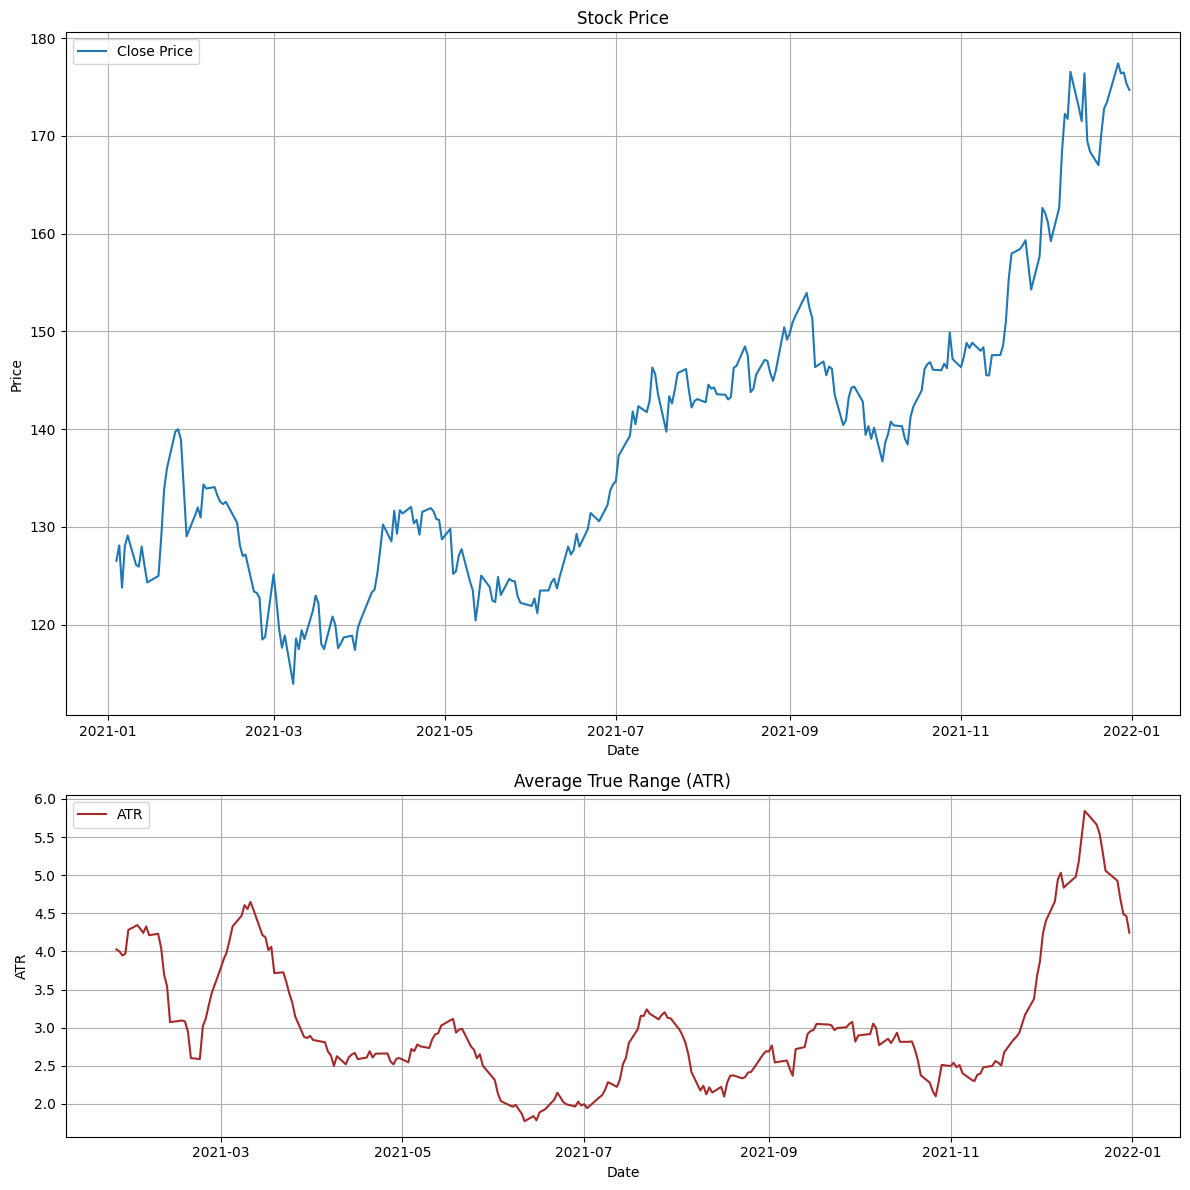

In [76]:
# ATR Calculation
data['TR'] = np.maximum(data['High'] - data['Low'], 
                        np.maximum(abs(data['High'] - data['Close'].shift(1)), 
                                   abs(data['Low'] - data['Close'].shift(1))))
data['ATR'] = data['TR'].rolling(window=14).mean()

# Create figure with 2 subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12), height_ratios=[2, 1])

# Plot prices
ax1.plot(data['Date'], data['Close'], label='Close Price')
ax1.set_title('Stock Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price')
ax1.grid()
ax1.legend()

# Plot ATR
ax2.plot(data['Date'], data['ATR'], label='ATR', color='brown')
ax2.set_title('Average True Range (ATR)')
ax2.set_xlabel('Date')
ax2.set_ylabel('ATR')
ax2.grid()
ax2.legend()

plt.tight_layout()
plt.show()

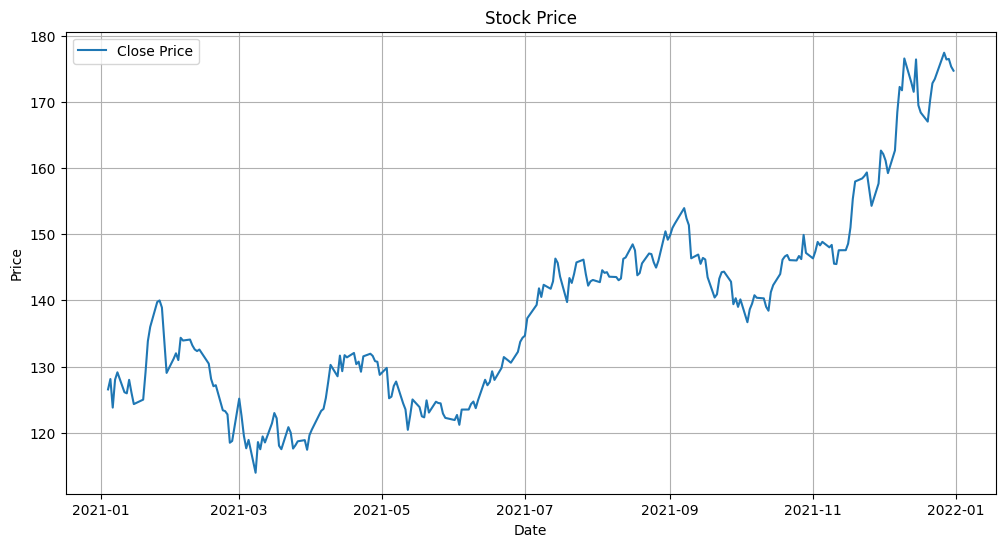

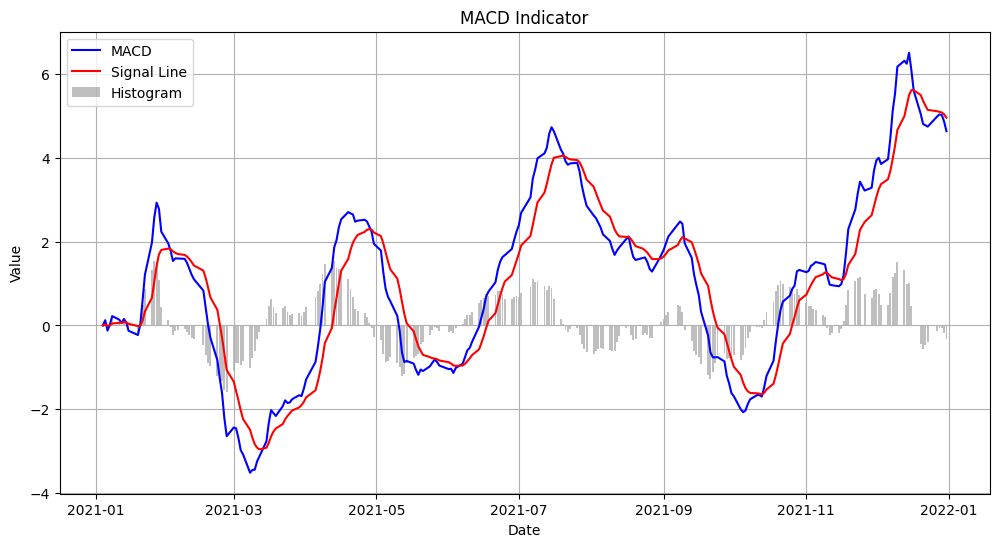

In [77]:
# MACD Calculation
data['EMA_12'] = data['Close'].ewm(span=12, adjust=False).mean()
data['EMA_26'] = data['Close'].ewm(span=26, adjust=False).mean()
data['MACD'] = data['EMA_12'] - data['EMA_26']
data['Signal_Line'] = data['MACD'].ewm(span=9, adjust=False).mean()
data['MACD_Histogram'] = data['MACD'] - data['Signal_Line']

# Plot price data
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Close Price')
plt.title('Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid()
plt.legend()
plt.show()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['MACD'], label='MACD', color='blue')
plt.plot(data['Date'], data['Signal_Line'], label='Signal Line', color='red')
plt.bar(data['Date'], data['MACD_Histogram'], label='Histogram', color='grey', alpha=0.5)
plt.title('MACD Indicator')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

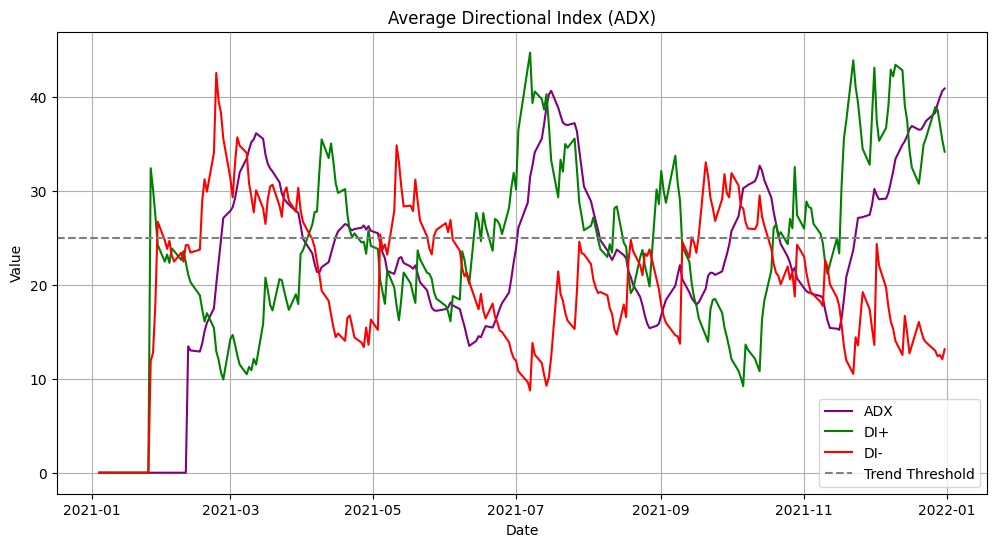

In [ ]:
# ADX Calculation
import ta


adx = ta.trend.ADXIndicator(
    high=data['High'].squeeze(),  # Convert to 1D
    low=data['Low'].squeeze(),   # Convert to 1D
    close=data['Close'].squeeze(),  # Convert to 1D
    window=14
)
data['ADX'] = adx.adx()
data['DI+'] = adx.adx_pos()
data['DI-'] = adx.adx_neg()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['ADX'], label='ADX', color='purple')
plt.plot(data['Date'], data['DI+'], label='DI+', color='green')
plt.plot(data['Date'], data['DI-'], label='DI-', color='red')
plt.title('Average Directional Index (ADX)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.axhline(25, color='grey', linestyle='--', label='Trend Threshold')
plt.legend()
plt.grid()
plt.show()